In [2]:
import numpy as np
import pandas as pd
import openpyxl
import csv
import matplotlib.pyplot as plt
import math

In [3]:
input_file = "2-2-A.csv"
output_file = "averaged_2-2-A.csv"

with open(input_file, mode='r') as file:
    csvFile = csv.reader(file)
    rows = list(csvFile)
    row_count = len(rows)
    column_count = len(rows[0]) if row_count > 0 else 0

header = rows[0]
gas_data = pd.DataFrame(rows[1:], columns=header)

time_col_name = header[46]
gas_data[time_col_name] = pd.to_numeric(gas_data[time_col_name], errors='coerce')



In [4]:
time_offset = gas_data[time_col_name].iloc[0]

gas_data[time_col_name] = (gas_data[time_col_name] - time_offset) / 1000

time_window = 60
data_window = int(time_window / 5)

averaged_data = [[] for _ in range(column_count)]

for i in range(0, row_count - 1, data_window):
    window_end = min(i + data_window, row_count - 1)
    for col in range(column_count):
        window_sum = 0
        count = 0
        for j in range(i, window_end):
            value = gas_data.iloc[j, col]
            value = pd.to_numeric(value, errors='coerce')  
            if pd.notna(value):  
                window_sum += value
                count += 1
        if count > 0:
            averaged_data[col].append(window_sum / count)


In [5]:
remaining_pts = row_count - 1 - int((row_count - 1) / data_window) * data_window
if remaining_pts > 0:
    for col in range(column_count):
        window_sum = 0
        count = 0
        for j in range(row_count - remaining_pts - 1, row_count - 1):
            value = gas_data.iloc[j, col]
            value = pd.to_numeric(value, errors='coerce')  
            if pd.notna(value): 
                window_sum += value
                count += 1
        if count > 0:
            averaged_data[col].append(window_sum / count)

In [6]:
max_length = max(len(col) for col in averaged_data)
for col in averaged_data:
    while len(col) < max_length:
        col.append(math.nan)

with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    for i in range(max_length):
        row = [averaged_data[col][i] for col in range(column_count)]
        writer.writerow(row)


In [7]:
input_file = "averaged_2-2-A.csv"
with open(input_file, mode='r') as file:
    csvFile = csv.reader(file)
    rows = list(csvFile)
    row_count = len(rows)
    column_count = len(rows[0]) if row_count > 0 else 0
gas_data = pd.DataFrame(rows)
gas_data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,CO_ppm_parts,CO_ppm_density,CO_temp,CO_humidity,TVOC_ppm_parts,TVOC_ppm_density,TVOC_temp,TVOC_humidity,O3_ppm_parts,O3_ppm_density,...,PM4.0_(/cm3),PM10.0_(/cm3),Typical_(nm),TimeStampMillis,SetupLoopExeTime=132870,SetupLoopOffset=27143,MillisMsb=4060217741,MillisLsb=1752713415,FileAttr1=4291371562,FileAttr2=257
1,55.0,63.0,29.31,81.1425,0.0,0.0,29.334999999999997,80.32333333333334,3.5,6.0,...,125.91666666666667,125.91666666666667,554.5833333333334,26.53158333333333,nan,nan,nan,nan,nan,nan
2,57.333333333333336,65.33333333333333,29.937500000000004,80.03000000000002,0.0,0.0,29.950833333333335,79.22500000000001,5.75,10.5,...,124.83333333333333,124.83333333333333,531.3333333333334,87.88041666666668,nan,nan,nan,nan,nan,nan
3,57.5,65.33333333333333,31.9225,74.03166666666667,0.0,0.0,31.775000000000006,73.37916666666668,8.75,16.5,...,112.0,112.0,547.0,149.38508333333334,nan,nan,nan,nan,nan,nan
4,59.166666666666664,67.33333333333333,33.36416666666667,67.78,0.0,0.0,32.69916666666666,69.00416666666666,12.083333333333334,23.166666666666668,...,127.5,127.66666666666667,582.0,210.94274999999996,nan,nan,nan,nan,nan,nan
5,91.66666666666667,105.08333333333333,33.219166666666666,67.73416666666668,0.0,0.0,32.354166666666664,69.70666666666666,3.5833333333333335,6.25,...,117.33333333333333,117.41666666666667,537.6666666666666,272.36608333333334,nan,nan,nan,nan,nan,nan
6,86.16666666666667,98.83333333333333,34.07666666666666,65.12583333333332,0.0,0.0,33.38,66.64583333333333,1.1666666666666667,1.5833333333333333,...,90.5,90.5,519.25,333.9065,nan,nan,nan,nan,nan,nan
7,228.58333333333334,262.75,33.276666666666664,67.43416666666666,88.91666666666667,88.91666666666667,32.52916666666666,68.87333333333332,0.0,0.0,...,89.0,89.0,507.9166666666667,395.31075000000004,nan,nan,nan,nan,nan,nan
8,16749.833333333332,19261.916666666668,32.59,66.46666666666668,20541.083333333332,20541.083333333332,31.91083333333333,67.7475,0.0,0.0,...,66.58333333333333,66.58333333333333,501.0833333333333,456.8225,nan,nan,nan,nan,nan,nan
9,5898.416666666667,6782.583333333333,35.968333333333334,88.61416666666666,11140.5,11140.5,34.211666666666666,87.29416666666667,3.0,5.666666666666667,...,143.16666666666666,143.25,549.1666666666666,518.3694166666667,nan,nan,nan,nan,nan,nan


In [20]:
x_time = []
CO = []
TVOC = []
O3 =[]
NO2 = []
SO2 = []
for i in range(1,row_count):
    x_time.append(float(gas_data[46][i]))
    CO.append(float(gas_data[0][i]))
    TVOC.append(float(gas_data[4][i]))
    O3.append(float(gas_data[8][i]))
    NO2.append(float(gas_data[12][i]))
    SO2.append(float(gas_data[16][i]))
    

In [21]:
x_time

[26.53158333333333,
 87.88041666666668,
 149.38508333333334,
 210.94274999999996,
 272.36608333333334,
 333.9065,
 395.31075000000004,
 456.8225,
 518.3694166666667,
 579.8961666666668,
 641.4345,
 702.8004999999999,
 764.1193333333334,
 825.4133333333333,
 886.6964166666666,
 947.9810833333335,
 999.0588750000001,
 999.0588750000001]

In [22]:
CO

[55.0,
 57.333333333333336,
 57.5,
 59.166666666666664,
 91.66666666666667,
 86.16666666666667,
 228.58333333333334,
 16749.833333333332,
 5898.416666666667,
 1546.25,
 659.75,
 384.75,
 282.3333333333333,
 234.5,
 207.83333333333334,
 186.66666666666666,
 175.0,
 175.0]

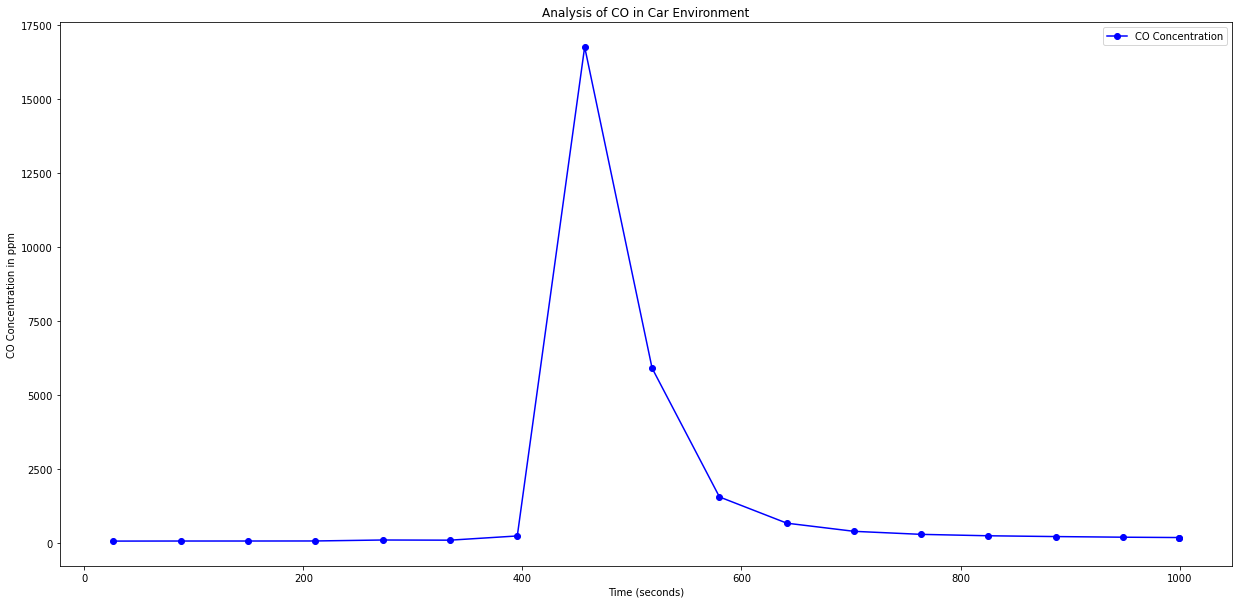

In [23]:
plt.figure(figsize=(21, 10))
plt.plot(x_time, CO, marker='o', linestyle="-", color='b', label='CO Concentration')

plt.xlabel('Time (seconds)')
plt.ylabel('CO Concentration in ppm')
plt.title('Analysis of CO in Car Environment')

plt.legend()
plt.show()

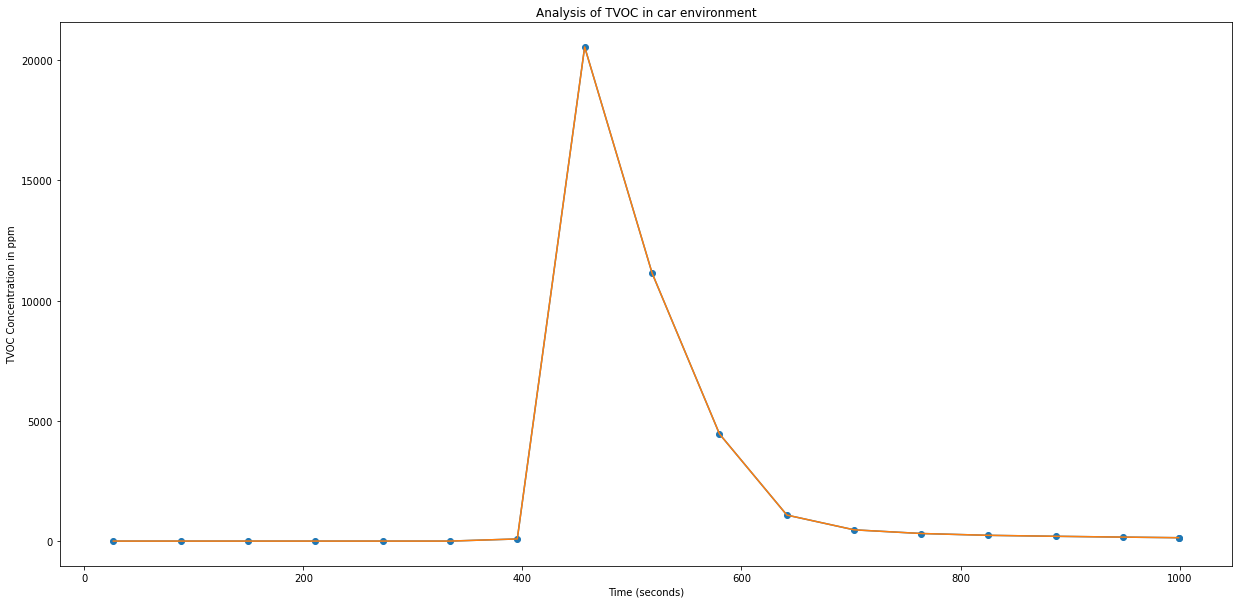

In [28]:
plt.figure(figsize=(21,10))
tvoc_plot = plt.plot(x_time, TVOC, marker ='o', linestyle = "-")

plt.plot(x_time, TVOC)
plt.xlabel('Time (seconds)')
plt.ylabel('TVOC Concentration in ppm')
plt.title('Analysis of TVOC in car environment')

plt.show()


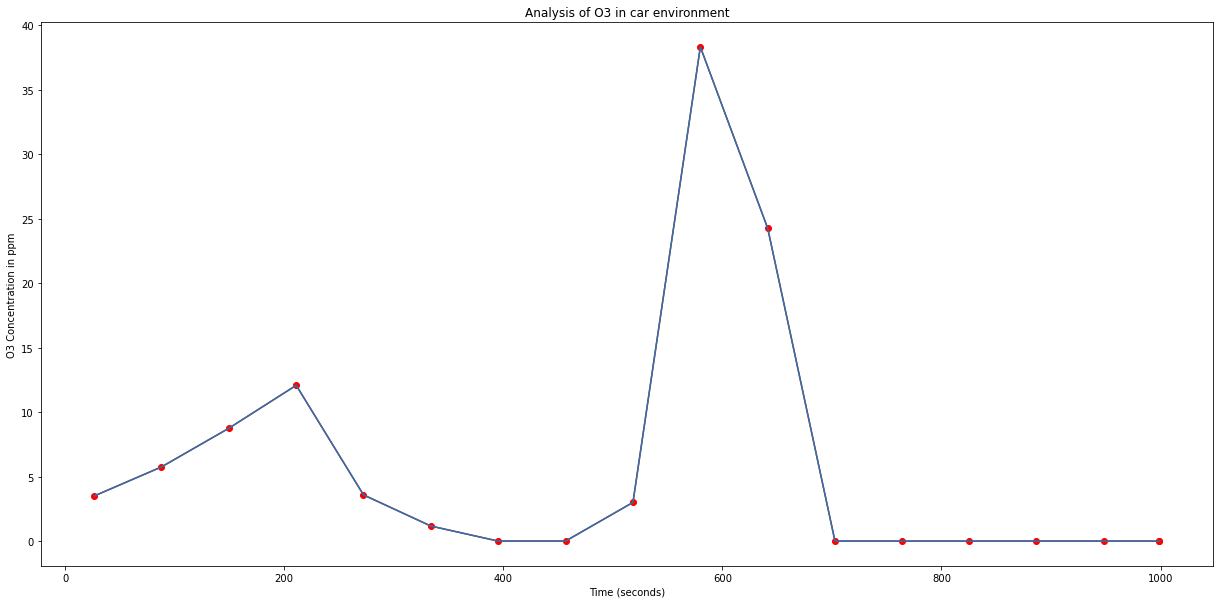

In [29]:
plt.figure(figsize=(21,10))
O3_plot = plt.plot(x_time, O3, marker ='o', linestyle = "-", color = 'r')

plt.plot(x_time, O3)
plt.xlabel('Time (seconds)')
plt.ylabel('O3 Concentration in ppm')
plt.title('Analysis of O3 in car environment')

plt.show()

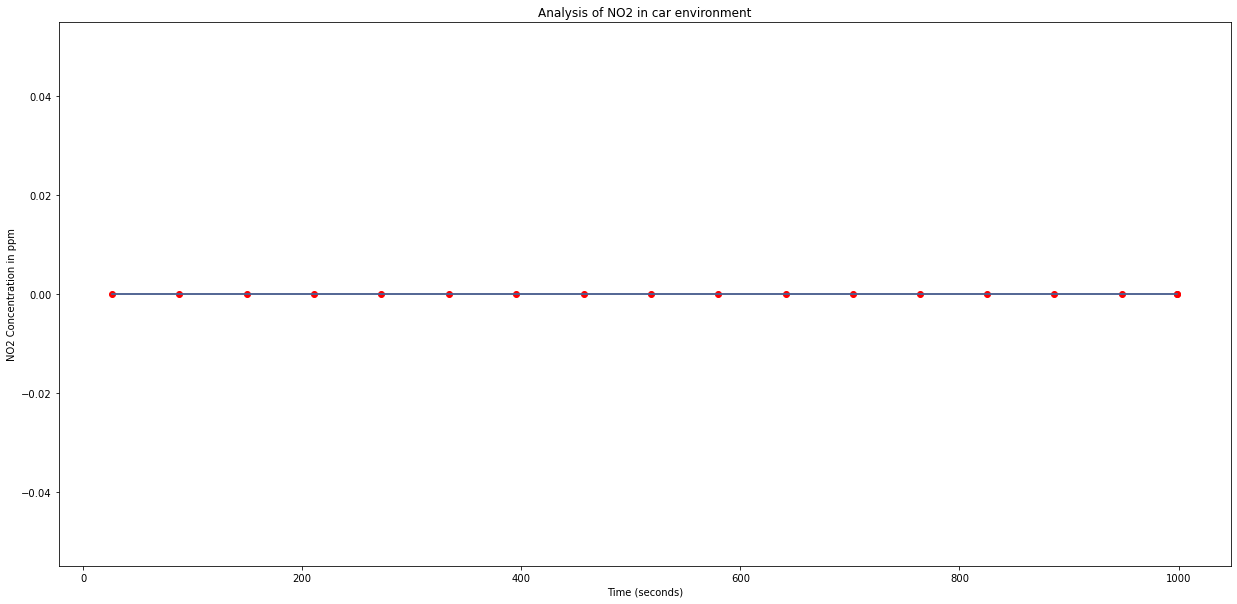

In [30]:
plt.figure(figsize=(21,10))
no2_plot = plt.plot(x_time, NO2, marker ='o', linestyle = "-", color = 'r')

plt.plot(x_time, NO2)
plt.xlabel('Time (seconds)')
plt.ylabel('NO2 Concentration in ppm')
plt.title('Analysis of NO2 in car environment')

plt.show()

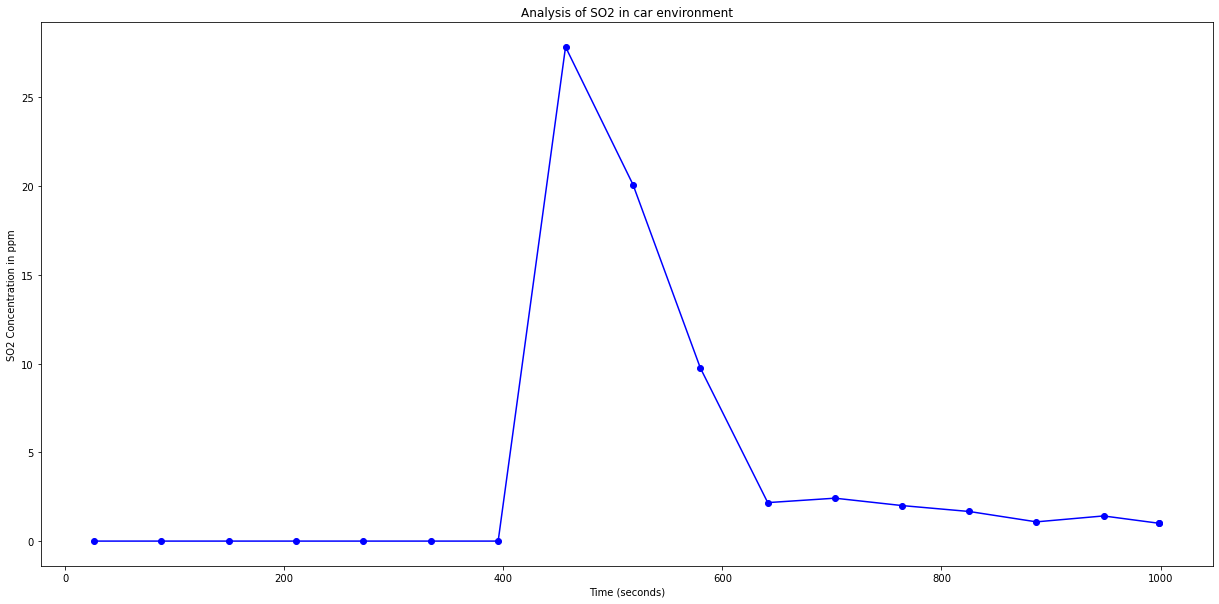

In [31]:
plt.figure(figsize=(21,10))
so2_plot = plt.plot(x_time, SO2, marker ='o', linestyle = "-", color = 'b')

plt.xlabel('Time (seconds)')
plt.ylabel('SO2 Concentration in ppm')
plt.title('Analysis of SO2 in car environment')

plt.show()